#### Preprocessing Iris Dataset


In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from scipy.stats import mode

### Data Import

In [3]:
# --- Load Iris Dataset ---
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Cleaning

#### Handling Missing Values

In [4]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64


#### Handling Dup;icates

In [5]:

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()



Number of duplicate rows: 1


#### EDA

In [6]:
# Verify data types
print("\nData types:\n", df.dtypes)



Data types:
 sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
class                category
dtype: object


In [7]:
#  Rename columns (optional)
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

print("\nCleaned DataFrame:\n", df.head())


Cleaned DataFrame:
    sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualizations

In [9]:
# Separate DataFrames for each species using 'class' column
iris_setosa = df.loc[df["class"] == "setosa"]
iris_virginica = df.loc[df["class"] == "virginica"]
iris_versicolor = df.loc[df["class"] == "versicolor"]


In [10]:
#  Rename columns (optional)
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

print("\nCleaned DataFrame:\n", df.head())


Cleaned DataFrame:
    sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##### Histogram

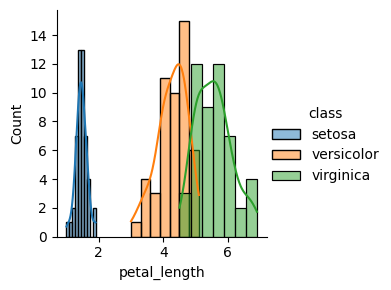

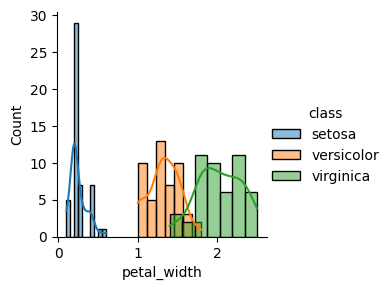

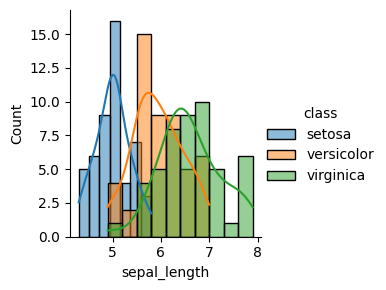

In [11]:
# Petal Length Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "petal_length", kde=True).add_legend()

# Petal Width Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "petal_width", kde=True).add_legend()

# Sepal Length Distribution by Species
sns.FacetGrid(df, hue="class", height=3).map(sns.histplot, "sepal_length", kde=True).add_legend()

plt.show()

#### Box Plot

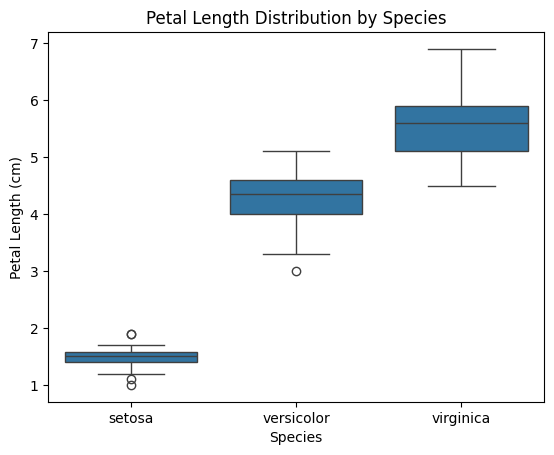

In [12]:
# Box plot of Petal Length by Species
sns.boxplot(x="class", y="petal_length", data=df)
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.title("Petal Length Distribution by Species")
plt.show()

#### violinplot

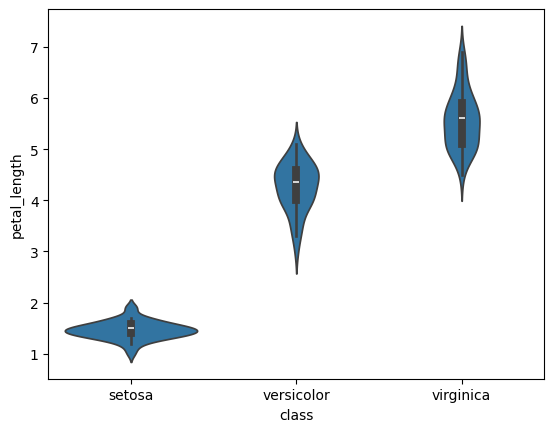

In [13]:
sns.violinplot(x="class", y="petal_length", data=df)
plt.show()

#### Correlation Heatmap

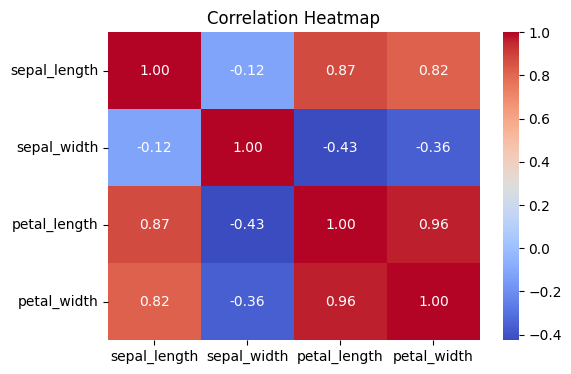

In [16]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Petal length and petal width,sepal length and sepal width width are highly correlated



##### **Splitting Data**


In [19]:
def split_data(dataframe, target_column='class', test_size=0.2, random_state=42):
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Example split
X_train, X_test, y_train, y_test = split_data(df)
print(f"\nTrain set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")


Train set: 119 rows
Test set: 30 rows


##### **Normalize features using Min-Max scaling**


In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### **Encode class labels**

In [22]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [23]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

X_train_scaled shape: (119, 4)
y_train_encoded shape: (119,)


#### Save the preprocessed data for next task use

In [27]:
# Convert scaled features back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Combine with target labels
preprocessed_df = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)

# Save to CSV
output_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\K_Mean_Clustering\Cleaned_iris_data_preprocessed.csv"
preprocessed_df.to_csv(output_path, index=False)

print(f"✅ Preprocessed data saved to:\n{output_path}")


✅ Preprocessed data saved to:
C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\K_Mean_Clustering\Cleaned_iris_data_preprocessed.csv
